In [6]:
import json
with open('lmg_pretrained_pipeline_v2.json', 'r') as f:
    data = json.load(f)

In [9]:
import matplotlib.pyplot as plt
from statistics import mean, stdev

bce_weights = sorted([i['parameters']['bce_weight'] for i in data])

def statistics_per_key(list_of_dict):
    keys = list_of_dict[0].keys()
    result = {}
    for key in keys:
        result[key] = [mean([i[key] for i in list_of_dict]), stdev([i[key] for i in list_of_dict])]
    return result

for bce in bce_weights:
    trials = sum([i['trials'] for i in data if i['parameters']['bce_weight'] == bce], [])
    datas = []
    for trial in trials:
        for epoch in trial:
            datas.append(epoch['data'])
    print(statistics_per_key(datas))

{'micro_auroc': [0.9132850575447082, 0.014053198142915172], 'mcc': [0.5086702168043855, 0.0478249281221825], 'accuracy': [0.9508078694343567, 0.007433570106858237], 'precision': [0.5406099104881287, 0.0812906295287522], 'sensitivity': [0.5362679433822631, 0.08670732852445102], 'specificity': [0.9734506535530091, 0.010720626951657295]}
{'micro_auroc': [0.9139551615715027, 0.016073777137399572], 'mcc': [0.5166505306289662, 0.04356104552637323], 'accuracy': [0.9559656357765198, 0.004781270096448642], 'precision': [0.60270538687706, 0.06653803348624475], 'sensitivity': [0.4884848487377167, 0.07881101007134819], 'specificity': [0.9815001344680786, 0.007312650933221228]}
{'micro_auroc': [0.9055863285064697, 0.01868757037475649], 'mcc': [0.5146091671238225, 0.05571533368076269], 'accuracy': [0.9565042138099671, 0.004310527675351594], 'precision': [0.6103387320041657, 0.06497421085052245], 'sensitivity': [0.47878788053989413, 0.09390043558016233], 'specificity': [0.9825977873802185, 0.00657570

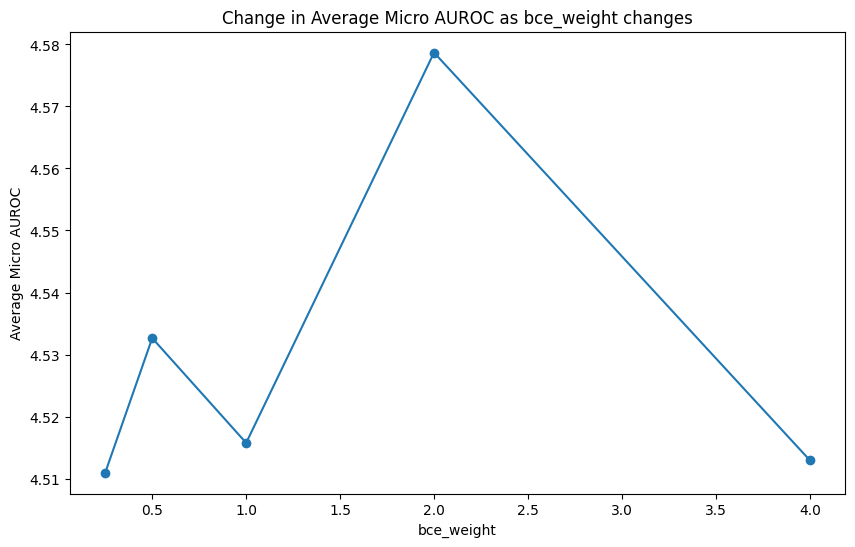

In [3]:
import matplotlib.pyplot as plt
from statistics import mean, stdev

bce_weights = [i['parameters']['bce_weight'] for i in data]

for bce in bce_weights:
    trials = sum([i['trials'] for i in data if i['parameters']['bce_weight'] == bce], [])


# Plot the data
plt.figure(figsize=(10,6))
plt.plot(bce_weights, micro_aurocs, marker='o')
plt.xlabel('bce_weight')
plt.ylabel('Average Micro AUROC')
plt.title('Change in Average Micro AUROC as bce_weight changes')
plt.show()